## Rapport TME1 - Arbres de décision, sélection de modèles

Membres du binôme :
- KRISNI Almehdi
- ARICHANDRA Santhos

Dans ce TME, on aborde les aspects essentiels des arbres de décision. Les arbres sont des modèles de classification hiérarchique, en d'autres termes, pour des exemples de la forme **x** = *(x1, x2, ..., xd)*, on associe à chaque noeud de l'arbre un test sur une des dimensions de *xi* de la forme *xi* <= s avec s une valeur réelle. Le test indique le noeud fils devant être sélectionné. La feuille atteinte après l'ensemble des tests est la classe prédite pour un exemple.

### **L'essentiel sur les arbres de décision**

On cherche à implémenter les fonctions utiles au calcul du partitionnement optimal, soit les fonctions de calcul d'entropie. Toutes les méthodes sont situées dans le fichier *methodesTME.py* du répertoire.

In [1]:
# Import du fichier methodesTME.py
from methodesTME import *

# Import utilitaires
import random
import numpy as np
import pickle
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTree
import pydotplus

# L'affichage des pdf grâce à cette source et la librairie plot_tree
from sklearn.tree import plot_tree

On code la méthode *entropie* permettant à partir d'un vecteur (une liste ou un vecteur numpy), de calculer l'entropie de ce vecteur. Une entropie importante représente un ensemble de données hétérogène tandis qu'une entropie nulle représente un ensemble homogéne, soit composé d'une seule et unique valeur.

On réalise quelques tests avec la méthode crée sur des vecteurs différents.

In [2]:
# Tests d'entropie
vT1 = [random.randint(0, 10) for _ in range(10)]
vT2 = [random.randint(0, 10) for _ in range(10)]
vT3 = [1 for _ in range(10)]

print("Vecteur :", vT1, "\tEntropie :", entropie(vT1))
print("Vecteur :", vT2, "\tEntropie :", entropie(vT2))
print("Vecteur :", vT3, "\tEntropie :", entropie(vT3))

Vecteur : [7, 3, 4, 1, 6, 5, 10, 1, 4, 5] 	Entropie : 1.8866967846580784
Vecteur : [4, 9, 4, 3, 9, 2, 3, 4, 7, 2] 	Entropie : 1.5571130980576458
Vecteur : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 	Entropie : 0.0


On code la méthode *entropie_cond* qui à partir d'une liste de vecteurs, calcule l'homogéinité de la partition obtenue. Il s'agit de la moyenne pondérée des entropies des sous-ensembles obtenus.

On réalise un test avec les vecteurs créés à l'étape précédente.

In [3]:
# Test d'entropie conditionnelle
print("Ensemble de vecteurs :", vT1, vT2, vT3, sep="\n")
print("\nEntropie conditionnelle de la partition :", entropie_cond([vT1, vT2, vT3]))

Ensemble de vecteurs :
[7, 3, 4, 1, 6, 5, 10, 1, 4, 5]
[4, 9, 4, 3, 9, 2, 3, 4, 7, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Entropie conditionnelle de la partition : 1.1479366275719078


Afin de charger un extrait des données de la base imdb, on dispose d'un code fourni par le sujet du TME permettant le chargement d'une zone précise du fichier. On exécute le code afin de conserver en mémoire les données et ne pas avoir à les recharger à chaque utilisation.

On réalise aussi différents affichages afin de mieux comprendre les données utilisées.

In [4]:
# Data : tableau (films, features), id2titles : dictionnaire id -> titre,
# fields : id feature -> nom
[data, id2titles, fields]= pickle.load(open("dataset/imdb_extrait.pkl", "rb"))
# La derniere colonne est le vote
datax = data[:,:32]
datay = np.array([1 if x [33] > 6.5 else -1 for x in data])

# On affiche le nom des différents champs
print("Les différents champs des données dans data sont :", fields, sep="\n")

# On affiche la taille, la première instance de la base de données récupérée et son label
print("\nLe nombre d'exemples dans la base de données est de :", len(datax))
print("\nLa attributs du premier exemple sont :", ["{0:0.2f}".format(i) for i in datax[0]], sep='\n')
print("\nLe label du premier exemple est :", datay[0])

# On affiche le premier titre
print("\nLe titre du premier film de data est :", id2titles[0])

Les différents champs des données dans data sont :
{0: 'Sci-Fi', 1: 'Crime', 2: 'Romance', 3: 'Animation', 4: 'Music', 5: 'Comedy', 6: 'War', 7: 'Horror', 8: 'Film-Noir', 9: 'Adult', 10: 'News', 11: 'Reality-TV', 12: 'Thriller', 13: 'Western', 14: 'Mystery', 15: 'Short', 16: 'Talk-Show', 17: 'Drama', 18: 'Action', 19: 'Documentary', 20: 'Musical', 21: 'History', 22: 'Family', 23: 'Adventure', 24: 'Fantasy', 25: 'Game-Show', 26: 'Sport', 27: 'Biography', 28: 'Duree', 29: 'couleur', 30: 'annee', 31: 'budget', 32: 'nb_votes', 33: 'rating'}

Le nombre d'exemples dans la base de données est de : 4587

La attributs du premier exemple sont :
['0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '108.00', '2.00', '1988.00', '12324000.00']

Le label du premier exemple est : -1

Le titre du premier film de data est : 'Crocodile

On obtient donc une base de données conservée dans la variable data. Chaque ligne de data représente un film précis et on dispose de plusieurs attributs à propos de ce dernier comme son genre, sa durée, son année de sortie ou son budget par exemple.

Le genre du film est géré par un one-hot encoding sur les 28 premiers attributs. Si pour un de ses attributs on retrouve la valeur 1, alors cela signifie que le film appartient au genre représenté par l'attribut. On peut, comme pour le premier exemple, trouver un film appartenant à plusieurs catégories.

Le vecteur datay contient le score de chacun des films et ce score est égal à 1 si la moyenne de ses notes est supérieur à 6.5, ou égal à -1 dans le cas contraire.

On s'intéresse maintenant à l'entropie du vecteur datay contenant les labels de chacun des films, puis à l'entropie conditionnelle des vecteurs des 28 premiers attributs de chacun des exemples de la base de données.

In [5]:
# On affiche l'entropie de datay
entY = entropie(datay)
print("L'entropie de Y est :", entY, '\n')

# Entropie conditionnelle pour chaque attribut binaire (attributs 0 à 27)
ent_cond = np.zeros(28)

for i in range(28) :
    # On cherche quels sont les exemples dont l'attribut i est égal à 0 ou 1
    ind0 = np.where(np.array([x[i] for x in datax]) == 0)
    ind1 = np.where(np.array([x[i] for x in datax]) == 1)

    # On récupère les différents labels
    lab0 = [datay[j] for j in ind0][0]
    lab1 = [datay[j] for j in ind1][0]

    # On sauvegarde l'entropie conditionnelle sur l'attribut i
    ent_cond[i] = entropie_cond([lab0, lab1])

# On affiche les différentes entropies conditionnelles calculées
print("Les entropies conditionnelles en fonction de chaque attribut (0 à 27) sont :", ent_cond, sep='\n')


L'entropie de Y est : 0.6840731540145955 

Les entropies conditionnelles en fonction de chaque attribut (0 à 27) sont :
[0.67994028 0.68360929 0.6840712  0.68252302 0.68406157 0.67298199
 0.67776557 0.66834313 0.68159391 0.68407315 0.68407315 0.68407315
 0.67613533 0.68266372 0.68398548 0.6837022  0.68407315 0.64202544
 0.67267917 0.68320271 0.68236801 0.67462006 0.68276896 0.68388467
 0.68249102 0.68407315 0.68407204 0.66945832]


On comprend alors que la différence entre l'entropie de Y et l'entropie de Y conditionnellement à un des attributs i est le gain d'information obtenu grâce à l'utilisation de l'attribut i. On cherche donc à maximiser ce gain d'information en réalisant une comparaison entre l'entropie de Y et les entropies conditionnelles.

In [6]:
# On crée la liste contenant la différence d'entropie entre Y et Y conditionnellement à l'attribut i
difEnt = (entY - ent_cond).tolist()
indAtt= difEnt.index(max(difEnt))

# On affiche les résultats obtenus
print("Le gain d'information pour chacun des attributs i est :", difEnt, sep='\n')
print("\nLe meilleur attribut pour réaliser la séparation est", fields[indAtt], "( en position", indAtt, ").")

Le gain d'information pour chacun des attributs i est :
[0.00413287340530788, 0.00046386323157165954, 1.9551364983660946e-06, 0.0015501296269213594, 1.1586434889521158e-05, 0.011091159441398268, 0.006307582810820889, 0.015730023292110373, 0.002479248608378226, 0.0, 0.0, 0.0, 0.007937823466661387, 0.0014094297134645828, 8.767079884108853e-05, 0.0003709584397669774, 0.0, 0.04204771856211831, 0.011393982540818137, 0.0008704410364122062, 0.0017051473508644666, 0.009453090064388325, 0.001304193427266287, 0.00018848299466323049, 0.0015821370532405066, 0.0, 1.1176414111968569e-06, 0.014614838257637763]

Le meilleur attribut pour réaliser la séparation est Drama ( en position 17 ).


### **Quelques expériences préliminaires**

On implémente désormais les arbres de décision grâce à la librairie scikit-learn et son module DecisionTreeClassifier. On réalise la création et l'apprentissage sur différents arbres de profondeurs maximale différentes afin de comparer les résultats obtenus.

La méthode *treeMaker* a été codée afin de permettre une création d'arbres de décision rapide sans avoir à supprimer ceux sauvegardés, afficher leur précision et leur forme. On passe en paramètre à la méthode la profondeur maximale, le dataset d'exemples et le dataset de labels.

Il existe également une option afin d'éviter d'afficher à chaque fois l'arbre puisque pour que les grands arbres, cela demande un long temps d'exécution.

Précision de l'arbre de décision avec une profondeur maximale de 2 : 0.6825812077610639 



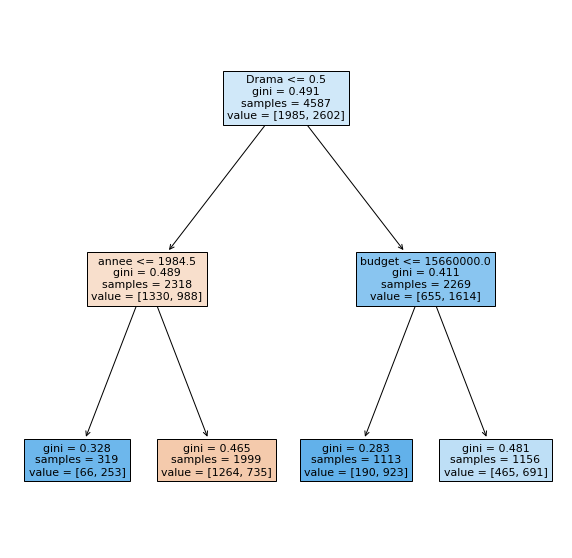

Précision de l'arbre de décision avec une profondeur maximale de 5 : 0.736647045999564 

Précision de l'arbre de décision avec une profondeur maximale de 10 : 0.8489208633093526 

Précision de l'arbre de décision avec une profondeur maximale de 20 : 0.9895356442119032 

Précision de l'arbre de décision avec une profondeur maximale de 30 : 0.999781992587748 

Précision de l'arbre de décision avec une profondeur maximale de 32 : 1.0 



In [7]:
# Pour une profondeur maximale = 2
treeMaker(2, datax, datay, doSave=False, doPlot=True)

# Pour une profondeur maximale = 5
treeMaker(5, datax, datay, doSave=False)

# Pour une profondeur maximale = 10
treeMaker(10, datax, datay, doSave=False)

# Pour une profondeur maximale = 20
treeMaker(20, datax, datay, doSave=False)

# Pour une profondeur maximale = 30
treeMaker(30, datax, datay, doSave=False)

# Pour une profondeur maximale = 32
treeMaker(32, datax, datay, doSave=False)


On remarque donc que plus la profondeur maximale de l'arbre augmente, plus sa précision augmente. Cela s'explique du fait qu'avec une profondeur plus importante, l'arbre contient plus de noeuds et peut donc comparer les données sur plusieurs attributs, ce qui lui permet donc de mieux les classer. 

Le nombre d'exemples séparés diminue plus on descend dans l'arbre, ce qui est normal puisqu'on réalise la séparation des exemples avec les meilleurs attributs initialement, et que plus on descend dans l'arbre, plus les attributs utilisés pour effectuer la séparation ont un gain d'information faible initialement.

Dans notre cas, on retrouve une précision de 1 lorsque la profondeur maximale de l'arbre est de 32. On explique cette précision du fait que l'arbre a pu utilisé pratiquement la totalité des attributs des données afin de réaliser la classification.

Ces scores ne sont tout de même pas un indicateur fiable du comportement de l'algorithme puisque qu'on réalise une prédiction avec toutes les données d'apprentissage, ce qui explique pourquoi on retrouve une précision avec une profondeur importante. Il faudrait donc réaliser un apprentissage sur des données différentes que celles allant servir à la prédiction. On s'intéresse alors au sur et sous apprentissage, puis à la validation croisée, allant permettre de résoudre ce problème.

### **Sur et sous apprentissage**

On cherche à obtenir une meilleure estimation de l'erreur du classifieur appris, il faut donc utiliser 2 ensembles d'exemples étiquettés distincts :
- l'ensemble d'apprentissage, sur lequel nous allons réaliser l'apprentissage du classifieur
- l'ensemble de test, sur lequel nous allons évaluer le classifieur

On crée alors la méthode *dataPartition* réalisant la partition des données en ensemble d'apprentissage et de test de manière aléatoire, avec des proportions passées en paramètres. La somme de ces proportions doivent évidemment être égales à 1.

On réalise un affichage de l'évolution de l'erreur d'apprentissage et de test en fonction des tailles d'ensemble.

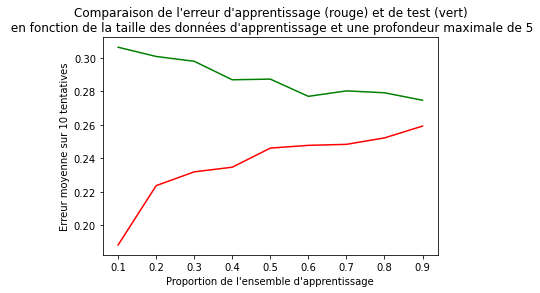

In [8]:
# Variables globales de test
n = 10
maxD = 5
appErrList = []
testErrList = []
prop = [(0.1) * i for i in range(1,10)]

# On itère sur différentes proportions d'ensemble d'apprentissage
for pApp in prop :
    pTest = 1 - pApp

    # Variables pour sauvegarder les erreurs avant d'effectuer la moyenne
    appErr = 0
    testErr = 0

    # On calcule n fois l'erreur afin d'obtenir une moyenne
    for i in range(n) :
        Xapp, Xtest, Yapp, Ytest = dataPartition(datax, datay, pApp, pTest)
        res1, res2 = quickError(Xapp, Xtest, Yapp, Ytest, maxDepth=maxD)
        appErr += res1
        testErr += res2

    # On ajoute la moyenne à la liste
    appErrList.append(appErr / n)
    testErrList.append(testErr / n)

# Affichage des courbes
plt.title("Comparaison de l'erreur d'apprentissage (rouge) et de test (vert)\n en fonction de la taille des données d'apprentissage et une profondeur maximale de " + str(maxD))
plt.ylabel("Erreur moyenne sur " + str(n) + " tentatives")
plt.xlabel("Proportion de l'ensemble d'apprentissage")
plt.plot(prop, appErrList, 'r')
plt.plot(prop, testErrList, 'g')
plt.show()

Après nos premiers tests, on remarque que plus la taille de l'ensemble d'apprentissage augmente, alors plus l'erreur d'apprentissage augmente et plus l'erreur de test diminue. On note tout de même que l'erreur de test reste toujours supérieure à l'erreur d'apprentissage ce qui est normal.

On décide de réaliser de nouveaux tests avec des profondeurs maximales différentes afin de vérifier si les tendances remarquées se confirment ou non.

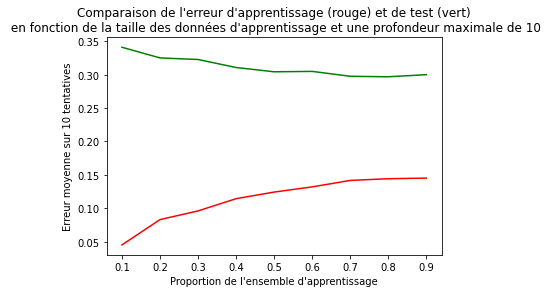

In [9]:
# Pour une profondeur de 10
maxD = 10
appErrList, testErrList = quickTest(Xapp, Xtest, Yapp, Ytest, maxDepth=maxD)

# Affichage des courbes
plt.title("Comparaison de l'erreur d'apprentissage (rouge) et de test (vert)\n en fonction de la taille des données d'apprentissage et une profondeur maximale de " + str(maxD))
plt.ylabel("Erreur moyenne sur " + str(n) + " tentatives")
plt.xlabel("Proportion de l'ensemble d'apprentissage")
plt.plot(prop, appErrList, 'r')
plt.plot(prop, testErrList, 'g')
plt.show()

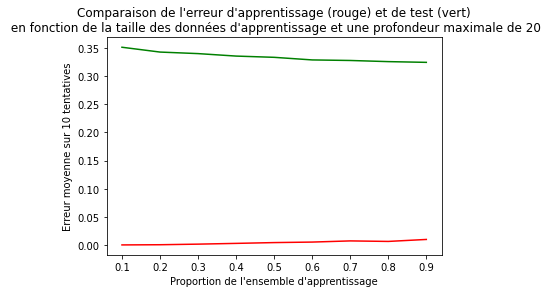

In [10]:
# Pour une profondeur de 20
maxD = 20
appErrList, testErrList = quickTest(Xapp, Xtest, Yapp, Ytest, maxDepth=maxD)

# Affichage des courbes
plt.title("Comparaison de l'erreur d'apprentissage (rouge) et de test (vert)\n en fonction de la taille des données d'apprentissage et une profondeur maximale de " + str(maxD))
plt.ylabel("Erreur moyenne sur " + str(n) + " tentatives")
plt.xlabel("Proportion de l'ensemble d'apprentissage")
plt.plot(prop, appErrList, 'r')
plt.plot(prop, testErrList, 'g')
plt.show()

On remarque donc que les mêmes augmentations et diminutions de valeurs d'erreurs restent exactes, même s'il semblerait que plus la profondeur de l'arbre de décision soit importante et moins l'erreur, que ce soit celle d'apprentissage ou de test, ne varie que très faiblement.

Afin de trouver les meilleurs paramètres à utiliser, on utilise la validation croisée (implémentée par sklearn par exemple).

### **Validation croisée et sélection de modèle**

Il existe un grand nombre de paramètres à faire varier afin d'obtenir le meilleure modèle d'apprentissage possible, il est donc impossible de tous les créer et comparer à la main. On utilise donc la procédure de validation croisée permettant la sélection des meilleurs paramètres possibles.

On crée une méthode *crossVal* permettant d'obtenir le meilleur modèle possible. Il s'agit d'une procédure assez similaire à la précédente mais on itère içi sur plusieurs profondeurs d'arbre possible afin de trouver la meilleure.<br/>La profondeur d'arbre est, en dehors du nombre de partitions, le seul paramètre que l'on peut faire varier.

Erreur minimale de classification pour l'apprentisssage : 0.0008962650265375571
Meilleure profondeur en apprentissage : 25

Erreur minimale de classification pour le test : 0.27556297628221593
Meilleure profondeur en test : 6


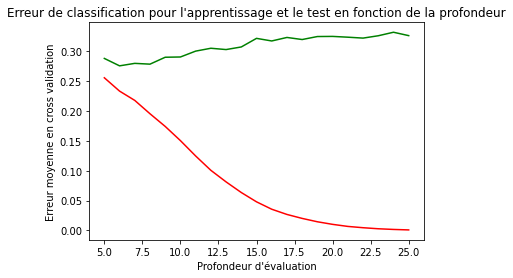

In [11]:
# On essaye avec la validation pour 10 partitions et une profondeur comprise entre 5 et 25
crossVal(datax, datay, 10, 5, 25, doPlot=True)